# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)

!pip install tomotopy
!pip install little_mallet_wrapper

import tomotopy as tp
import little_mallet_wrapper

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)

import pandas as pd

sanders_df = pd.read_csv('sanders_tweets.csv')
trump_df = pd.read_csv('trump_tweets.csv')

combined_df = pd.concat([sanders_df, trump_df], ignore_index=True)

combined_df.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('stopwords')

# Define a function to clean tweets
def clean_tweet_text(text):
    # Convert to lowercase
    cleaned_text = text.lower()

    # Remove URLs, user mentions, "realdonaldtrump", and Twitter stopword such as 'rt' and 'amp' 
    cleaned_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump|rt|amp", '', cleaned_text, flags=re.MULTILINE)

    # Remove punctuation and numbers
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    cleaned_text = re.sub(r'\d+', '', cleaned_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(cleaned_text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    # Join the words back into a string
    cleaned_text = ' '.join(filtered_text)

    return cleaned_text

# Apply the function to the dataframe
combined_df['Content'] = combined_df['Content'].apply(clean_tweet_text)

# Create lists
training_data = combined_df['Content'].tolist()
original_texts = combined_df['Content'].tolist()
titles = [f"{row['Username']}-{row['TweetId']}" for _, row in combined_df.iterrows()]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xumengying/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#check

training_data[0]

'wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase us minimum wage must tax rich raise minimum wage least'

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [6]:
# Q4 (code)

# Number of topics to return
num_topics = 8
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.153933752007312
Iteration: 10	Log-likelihood: -8.827921077616322
Iteration: 20	Log-likelihood: -8.68609106529106
Iteration: 30	Log-likelihood: -8.61703251489936
Iteration: 40	Log-likelihood: -8.576674490898442
Iteration: 50	Log-likelihood: -8.54302301725645
Iteration: 60	Log-likelihood: -8.519234762782048
Iteration: 70	Log-likelihood: -8.5030904123423
Iteration: 80	Log-likelihood: -8.490585642682705
Iteration: 90	Log-likelihood: -8.482849833680952


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [7]:
# Q5a (code)

print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

border great military strong people total crime endorsement law country

✨Topic 1✨

news fake media russia fbi trump collusion witch repo hunt

✨Topic 2✨

president trump senate house vote election republicans today us impeachment

✨Topic 3✨

democrats president biden trump joe would want people never nothing

✨Topic 4✨

us must states china united people country world trade change

✨Topic 5✨

people health care tax must americans workers million need pay

✨Topic 6✨

great thank new big president state today congratulations noh america

✨Topic 7✨

president years trump jobs economy american history ever year great



### Q5b Describe what each topic is about. What ideas, values, or situations do these keywords refer to?


✨Topic 0✨:  This topic revolves around national security, patriotism, and law enforcement. It emphasizes the importance of a strong military, strict border control, and crime prevention. 

✨Topic 1✨: This topic covers media credibility and political scandals, particularly involving allegations of collusion with Russia and FBI investigations. It reflects distrust in the media, accusations of fake news, and the contentious political environment during Trump’s presidency.

✨Topic 2✨: This topic focuses on electoral politics and governance in the US. It includes discussions on presidential actions, Senate and House activities, voting processes, and impeachment. 

✨Topic 3✨: This topic contrasts opinions on Democratic and Republican leaders, specifically Joe Biden and Donald Trump. It reflects partisan views, public expectations from political leaders, and ideological divisions within the populace.

✨Topic 4✨: This topic addresses international relations and global policy, especially US-China relations. It emphasizes the need for change and cooperation on the global stage, trade policies, and the role of the US in international affairs.

✨Topic 5✨: This topic deals with domestic issues such as healthcare, taxation, and economic welfare. It highlights the financial needs of American citizens, healthcare access, and worker’s rights. 

✨Topic 6✨: This topic often involves expressions of gratitude, achievements, and celebrations. It might include acknowledgments of significant events, presidential actions, and national pride. 

✨Topic 7✨: This topic highlights economic performance and historical achievements, often linked to Trump’s presidency. It discusses job creation, economic growth, and significant milestones in American history. 

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [9]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5522067192941904 
Per Topic: [0.6563437819480896, 0.7403626680374146, 0.45404970869421957, 0.4756686270236969, 0.5662062019109726, 0.6270387500524521, 0.45777871310710905, 0.4402053035795689]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [13]:
# Q6

I started with training the model with 8 topics. No coherence score above 0.560 when I attempted to reduce the number of topics to 6 or modify to 10. I so choose to continue with applying 8 topics, and the outcomes are as follows:

Topic 1 (0.740) and Topic 0 (0.656) show high coherence scores, suggesting that the words within the topics are highly related and form a cohesive theme. Topic 1 is an indicator of a well-defined topic.

Topic 5 (0.627) and Topic 4 (0.566) show moderate to high coherence, indicating the topics are reasonably interpretable.

Topic 2 (0.454), Topic 3 (0.476), Topic 6 (0.458), and Topic 7 (0.440) show lower coherence scores, suggesting these topics may be less clear or contain a mix of less related terms.

An average coherence score of 0.552 suggests that the topics are moderately coherent. This means that while the topics are not perfectly coherent, the words within each topic do share some semantic similarity.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [12]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [20]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
usernames = combined_df['Username'].tolist()

In [23]:
# Q7a (code)

from IPython.display import Markdown, display
import re

# get the top documents for some topics (between 2 and 5)
# topic_distributions[2]

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    return

In [25]:
# Display 5 documents for Topic 1

get_top_docs(titles, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

news fake media russia fbi trump collusion witch repo hunt



---


✨  
**Topic Probability**: 0.9501204490661621  
**Document**: @realDonaldTrump-1139862755383500800



✨  
**Topic Probability**: 0.9484423995018005  
**Document**: @realDonaldTrump-1110125791235526656



✨  
**Topic Probability**: 0.9466475248336792  
**Document**: @realDonaldTrump-1075732375169060869



✨  
**Topic Probability**: 0.9447231292724609  
**Document**: @realDonaldTrump-1103353074469535750



✨  
**Topic Probability**: 0.9447231292724609  
**Document**: @realDonaldTrump-1065225779825598465



In [38]:
# Display 5 documents for Topic 6

get_top_docs(titles, topic_distributions, topic_index=6, n=5)

### ✨Topic 6✨

great thank new big president state today congratulations noh america



---


✨  
**Topic Probability**: 0.9429483413696289  
**Document**: @realDonaldTrump-1278822989711228928



✨  
**Topic Probability**: 0.9406408667564392  
**Document**: @realDonaldTrump-1311376330299248648



✨  
**Topic Probability**: 0.9406408667564392  
**Document**: @realDonaldTrump-1264742043592593408



✨  
**Topic Probability**: 0.9406408667564392  
**Document**: @realDonaldTrump-1105116787451023360



✨  
**Topic Probability**: 0.9354166388511658  
**Document**: @realDonaldTrump-1142410006513500161



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [11]:
# Q7b (words)

The top 5 tweets on Topics 1 and 6 are all by Trump, demonstrating from the above data that some topics are dominated by tweets from a particular politician. I interpret as follows:

Topic 1 tweets are from @realDonaldTrump. This topic centres on subjects that were essential to Trump's speech during his presidency: fake news, media reliability, and investigations. This subject better captures the opinions and worries of Trump about the media and investigations.

Tweets on Topic 6 are from @realDonaldTrump as well. Expressions of thanks, accomplishments, and national pride centre this subject. Trump frequently boasts about the achievements of his government and praises America, hence these themes fit with his communication style. 

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [47]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

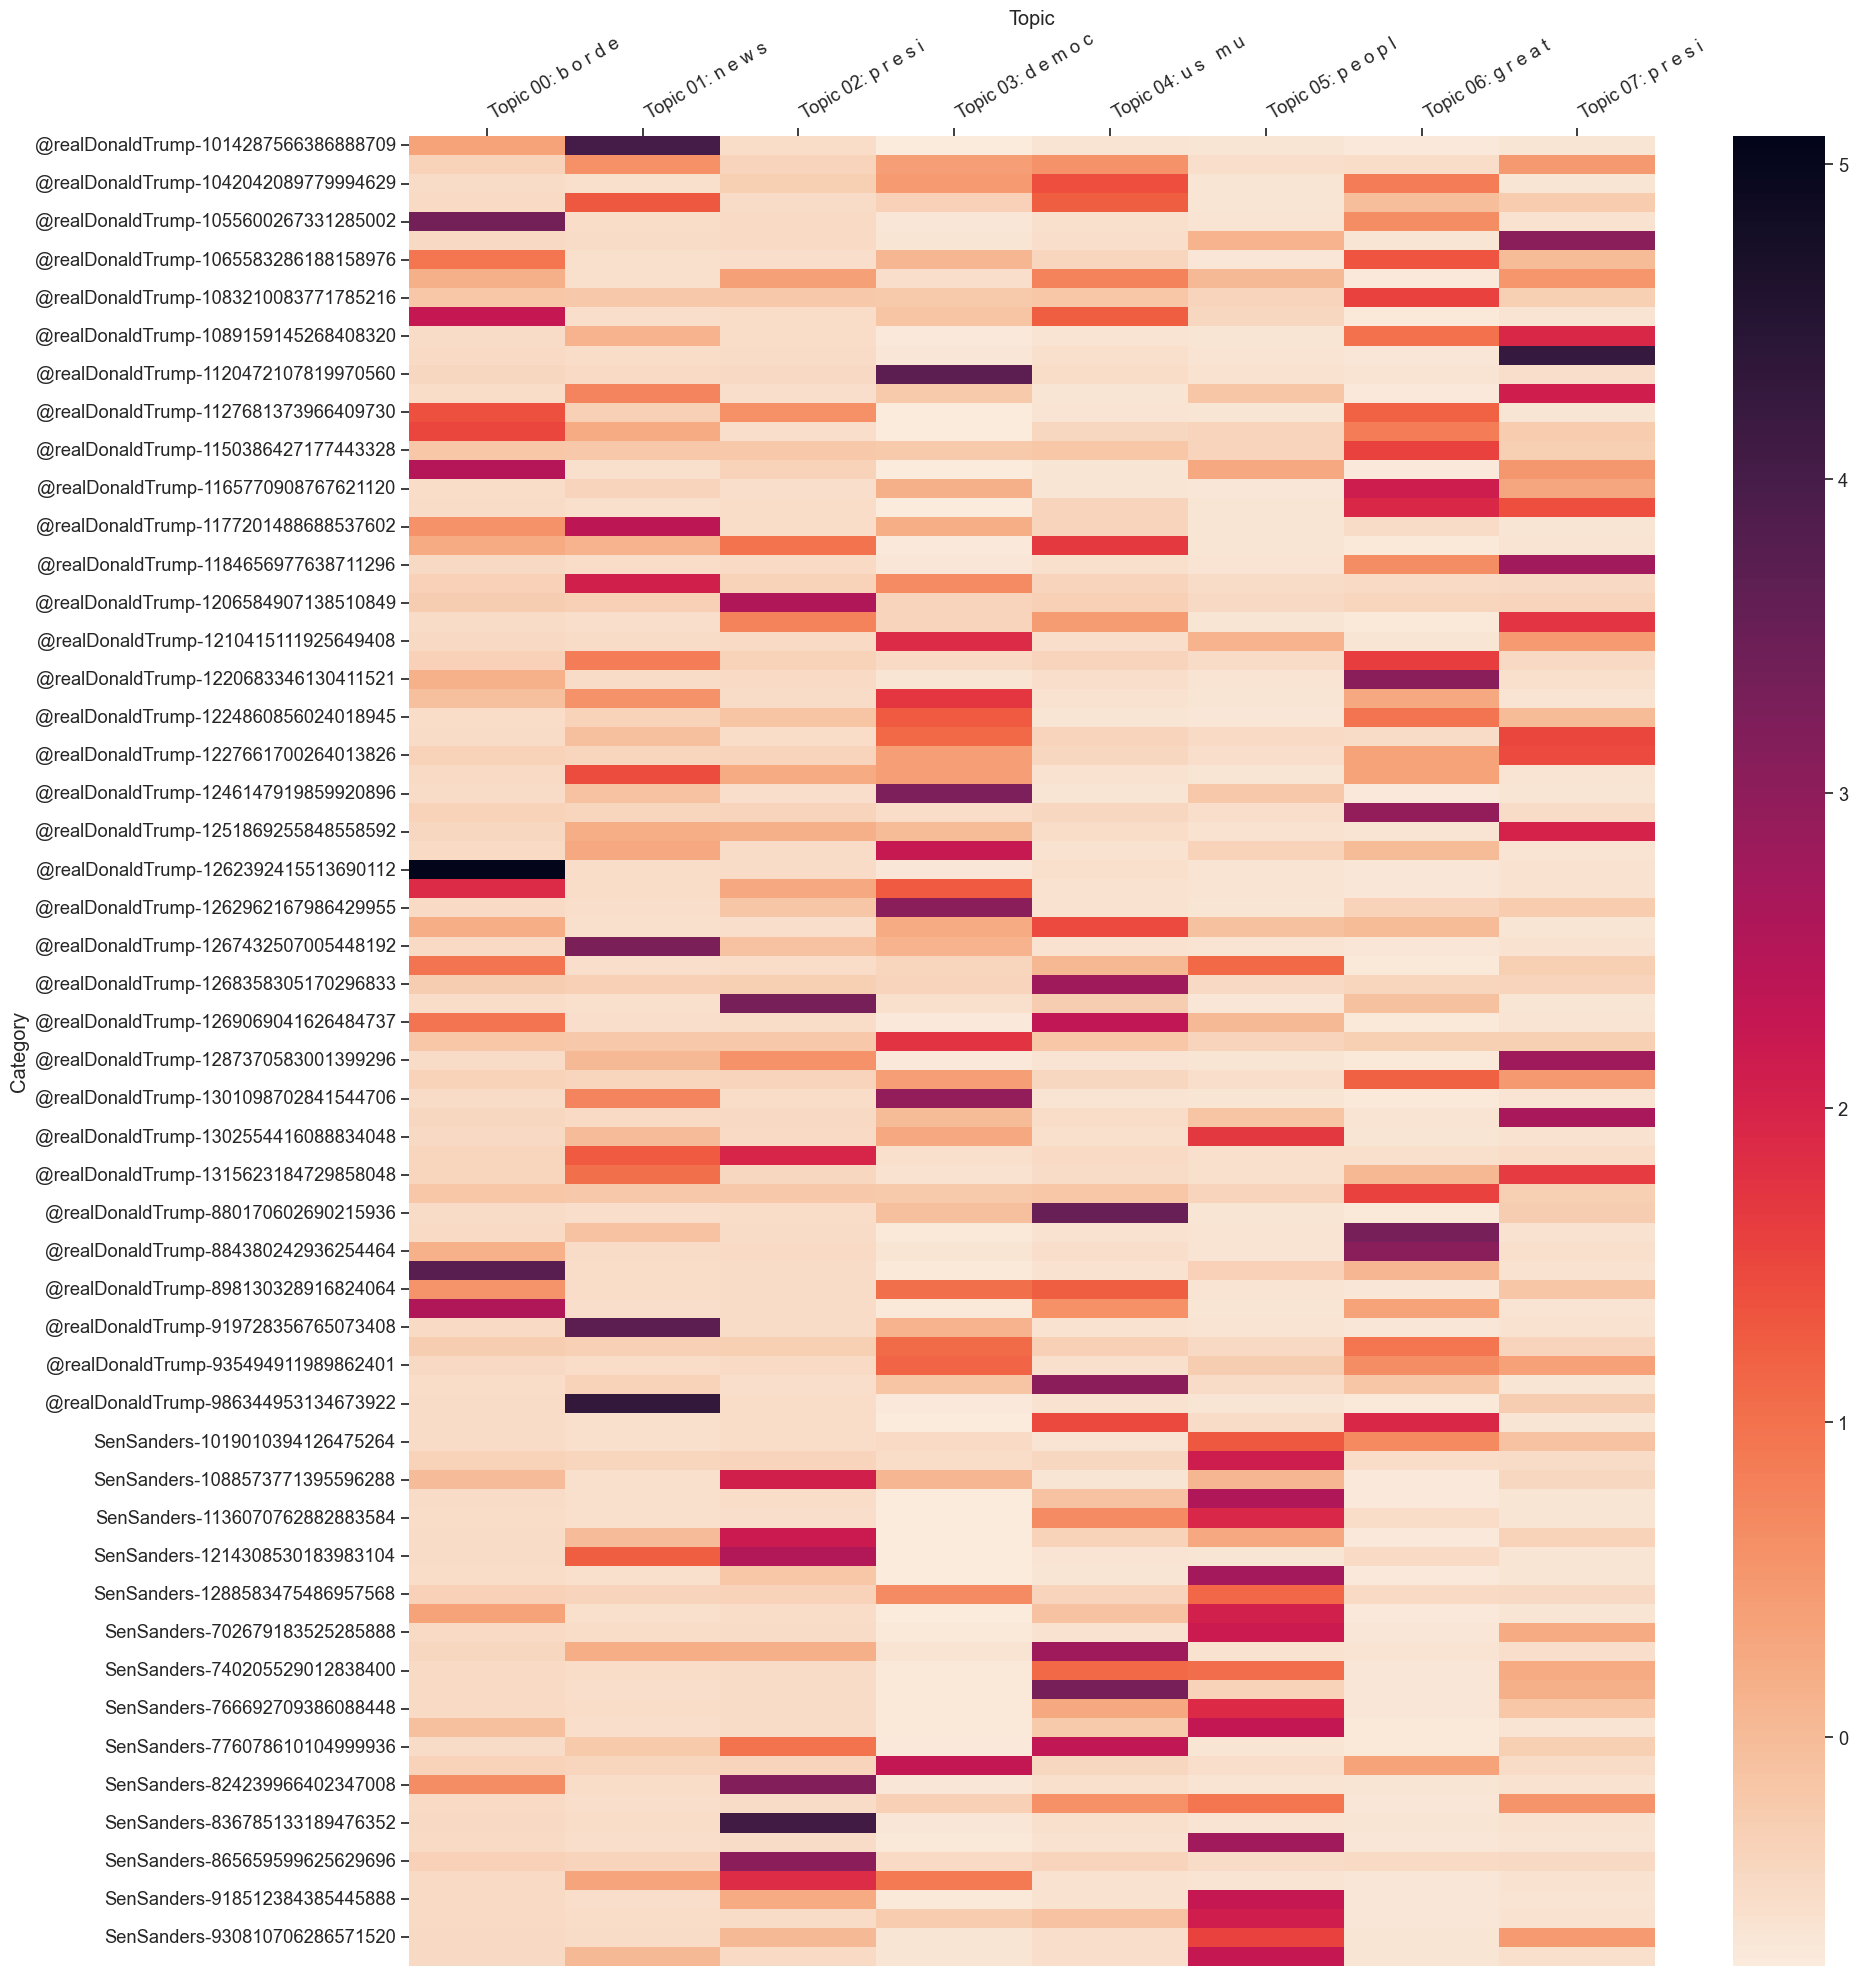

In [49]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()
    
plot_categories_by_topics_heatmap(titles, topic_distributions, topics, target_labels=target_labels, dim=(20, 20))

# Create a heatmap using the random sample

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [1]:
# Q9

The intensity of a topic's representation in each tweet is indicated by the colours in the heatmap, which go from light (low likelihood) to dark (high probability). The more common or prominent a specific topic is for one politician when compared to another, the more likely it is that the politician makes that topic a priority.

Topics like 0, 1, 3, 6 and 7 more likely to be addressed by Trump show his emphasis on media credibility, national security, and good messaging regarding the achievements of his administration.

Sanders is more likely to be interested in social justice, healthcare, and workers' rights, as seen by topic 2 and 5.

Topic 4 appears uniformly coloured in the two individuals' distribution, suggesting that these are their shared concerns.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [52]:
# X2 (code)

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.